## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jinja2 import Template
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import confusion_matrix, precision_score, f1_score,recall_score, accuracy_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer


In [2]:
# Disable all warnings
warnings.filterwarnings("ignore")

# Load the dataset 

In [3]:
df1 = pd.read_csv('dataset_1_colon_cancer.csv')
df2 = pd.read_csv('dataset_2_colon_cancer.csv')

In [4]:
# row and columns of datasets
df1.shape, df2.shape

((300, 6), (100, 6))

In [5]:
# to see the null value in dataset 
df1.isnull().sum()

AGE                     0
CEA Level               0
Colonoscopy Result      0
Polyp Size (mm)         0
Family History          0
Type of Colon Cancer    0
dtype: int64

In [79]:
# count the frequency of values
df1["Type of Colon Cancer"].value_counts()

Type of Colon Cancer
2    105
1     99
3     96
Name: count, dtype: int64

In [80]:
# count the frequency of values
df2["Type of Colon Cancer"].value_counts()

Type of Colon Cancer
2    40
1    33
3    27
Name: count, dtype: int64

## Data Preprocessing

the pd.concat() function is used to concatenate or stack DataFrames together. The ignore_index=True argument is a key parameter that controls how the index of the resulting DataFrame is handled.

In [7]:
# concat the both dataset 
merged_df = pd.concat([df1, df2], ignore_index = True)

In [8]:
merged_df["Type of Colon Cancer"].value_counts()

Type of Colon Cancer
2    145
1    132
3    123
Name: count, dtype: int64

In [9]:
merged_df

,AGE,CEA Level,Colonoscopy Result,Polyp Size (mm),Family History,Type of Colon Cancer,Tumor Grade,Biopsy Result,Lymph Node Involvement,Bowel Obstruction,Smoking History
0,78.0,17.361410,Normal,14.969663,No,1,NaN,NaN,NaN,NaN,NaN
1,68.0,14.008226,Normal,9.495306,Yes,1,NaN,NaN,NaN,NaN,NaN
2,54.0,12.445401,Normal,44.941506,Yes,3,NaN,NaN,NaN,NaN,NaN
3,82.0,4.139308,Abnormal,4.931454,No,1,NaN,NaN,NaN,NaN,NaN
4,47.0,8.935027,Normal,26.701058,No,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,2,3.0,Negative,Yes,Yes,Smoker
396,NaN,NaN,NaN,NaN,NaN,3,3.0,Positive,Yes,Yes,Smoker
397,NaN,NaN,NaN,NaN,NaN,2,3.0,Negative,Yes,Yes,Smoker
398,NaN,NaN,NaN,NaN,NaN,3,3.0,Negative,Yes,Yes,Smoker


In [10]:
# rows and columns of merge dataset 
merged_df.shape

(400, 11)

In [11]:
# to see null value in dataset
merged_df.isnull().sum()

AGE                       100
CEA Level                 100
Colonoscopy Result        100
Polyp Size (mm)           100
Family History            100
Type of Colon Cancer        0
Tumor Grade               300
Biopsy Result             300
Lymph Node Involvement    300
Bowel Obstruction         300
Smoking History           300
dtype: int64

In [12]:
from sklearn.impute import KNNImputer

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     300 non-null    float64
 1   CEA Level               300 non-null    float64
 2   Colonoscopy Result      300 non-null    object 
 3   Polyp Size (mm)         300 non-null    float64
 4   Family History          300 non-null    object 
 5   Type of Colon Cancer    400 non-null    int64  
 6   Tumor Grade             100 non-null    float64
 7   Biopsy Result           100 non-null    object 
 8   Lymph Node Involvement  100 non-null    object 
 9   Bowel Obstruction       100 non-null    object 
 10  Smoking History         100 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 34.5+ KB


In [14]:
# convert the categorical values in numerical value using get_dummy function
df_encoded = pd.get_dummies(merged_df,columns=['Colonoscopy Result', 'Family History', 'Biopsy Result',
                                               'Lymph Node Involvement', 'Bowel Obstruction', 'Smoking History'],dummy_na=False,drop_first=True)


KNN Imputer is a powerful technique for handling missing values in a dataset, especially when simple methods like mean, median, or mode imputation might not be suitable.



In [15]:
# Initialize KNN imputer.  Experiment with n_neighbors!
imputer = KNNImputer(n_neighbors=3) # Start with a small n_neighbors for small datasets

# Impute the missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

In [16]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         400 non-null    float64
 1   CEA Level                   400 non-null    float64
 2   Polyp Size (mm)             400 non-null    float64
 3   Type of Colon Cancer        400 non-null    float64
 4   Tumor Grade                 400 non-null    float64
 5   Colonoscopy Result_Normal   400 non-null    float64
 6   Family History_Yes          400 non-null    float64
 7   Biopsy Result_Positive      400 non-null    float64
 8   Lymph Node Involvement_Yes  400 non-null    float64
 9   Bowel Obstruction_Yes       400 non-null    float64
 10  Smoking History_Smoker      400 non-null    float64
dtypes: float64(11)
memory usage: 34.5 KB


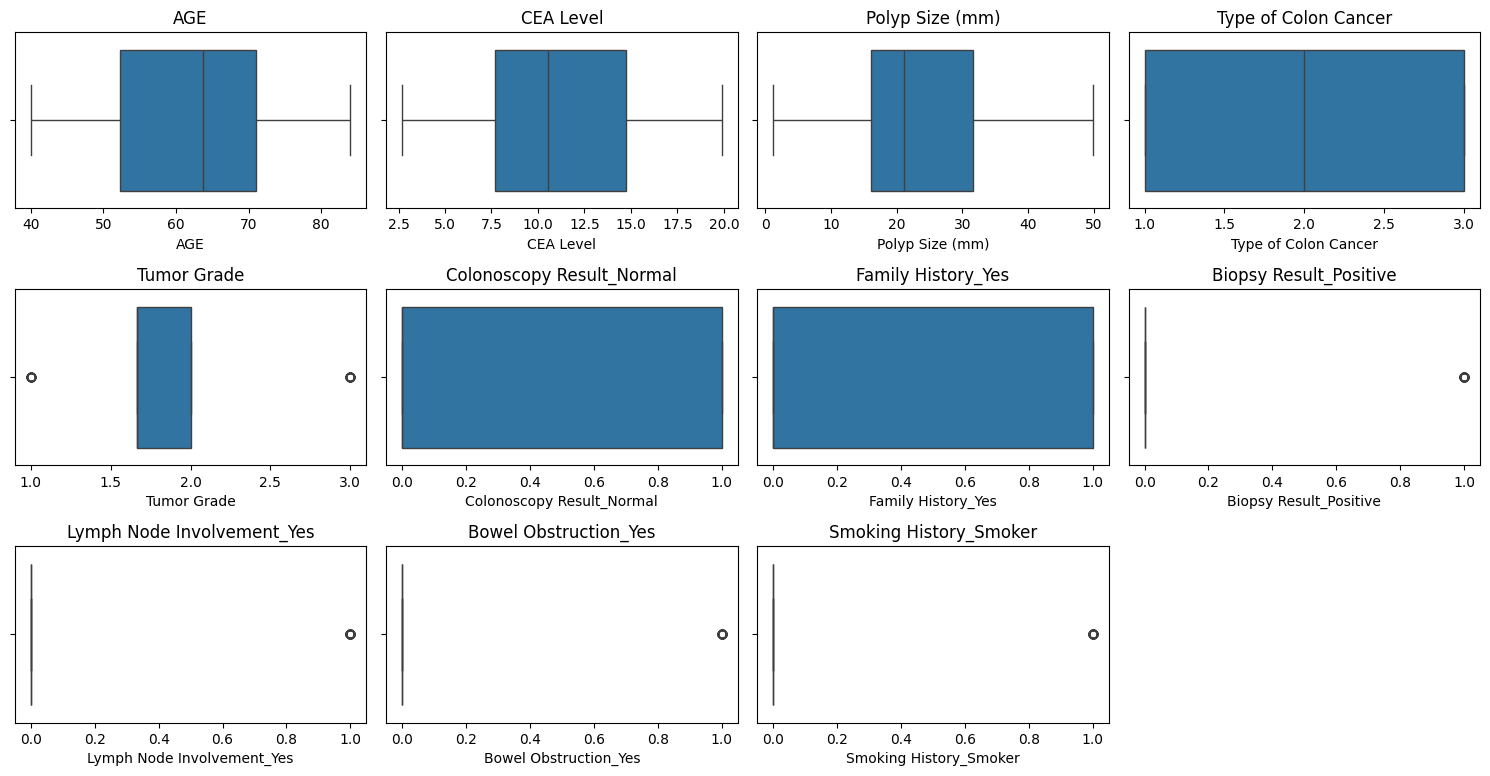

In [17]:
# Plot Boxplot for each feature to examine the Outlier in the features.
# Create a figure with a specified size (15 inches wide, 10 inches tall)
plt.figure(figsize=(15, 10)) 

# Iterate through each int64 and float64 column in the DataFrame 
for i,col in enumerate(df_imputed.select_dtypes(include=['float64','int64'])): 
     # Create a subplot in a 3x3 grid,
    plt.subplot(4,4,i+1)
    # Generate a boxplot
    sns.boxplot(x=col,data=df_imputed)
    # Set the title of the subplot to the column name
    plt.title(col)
# Adjust the spacing between subplots to prevent overlapping
plt.tight_layout()

# Display the figure with all the subplots
plt.show()

In [18]:
corr = df_imputed.corr()
corr

,AGE,CEA Level,Polyp Size (mm),Type of Colon Cancer,Tumor Grade,Colonoscopy Result_Normal,Family History_Yes,Biopsy Result_Positive,Lymph Node Involvement_Yes,Bowel Obstruction_Yes,Smoking History_Smoker
AGE,1.000000,-0.105680,-0.094963,-0.173147,-0.004541,0.002897,-0.009459,-0.027463,-0.033330,-0.029030,0.018937
CEA Level,-0.105680,1.000000,0.066453,0.168781,-0.048475,0.157588,0.161453,-0.114488,-0.126713,-0.119080,-0.163860
Polyp Size (mm),-0.094963,0.066453,1.000000,-0.004324,-0.024415,0.080005,0.045999,-0.089407,-0.106777,-0.097077,-0.083186
Type of Colon Cancer,-0.173147,0.168781,-0.004324,1.000000,0.202559,-0.085678,-0.020918,0.020087,0.038456,0.029598,-0.054964
Tumor Grade,-0.004541,-0.048475,-0.024415,0.202559,1.000000,-0.141960,-0.131771,0.053347,0.167314,0.192859,0.211035
Colonoscopy Result_Normal,0.002897,0.157588,0.080005,-0.085678,-0.141960,1.000000,0.207323,-0.305070,-0.329435,-0.308607,-0.312124
Family History_Yes,-0.009459,0.161453,0.045999,-0.020918,-0.131771,0.207323,1.000000,-0.313078,-0.338083,-0.316708,-0.320317
Biopsy Result_Positive,-0.027463,-0.114488,-0.089407,0.020087,0.053347,-0.305070,-0.313078,1.000000,0.486534,0.458244,0.405854
Lymph Node Involvement_Yes,-0.033330,-0.126713,-0.106777,0.038456,0.167314,-0.329435,-0.338083,0.486534,1.000000,0.522852,0.493816
Bowel Obstruction_Yes,-0.029030,-0.119080,-0.097077,0.029598,0.192859,-0.308607,-0.316708,0.458244,0.522852,1.000000,0.399459


In [19]:
# Saparate the depandent and indepandent features
x = df_imputed.drop(['Type of Colon Cancer'],axis=1)
y = df_imputed['Type of Colon Cancer']

In [20]:
# split the dataset into train and test dateset 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
def evaluate_model(y_test, y_train, y_test_pred, y_train_pred):
    """
    Evaluate a classification model.
    
    Args:
        y_test (pandas.Series): The test labels.
        y_train (pandas.Series): The train labels.
        y_test_pred (pandas.Series): The test predictions.
        y_train_pred (pandas.Series): The train predictions.
    
    Returns:
        pandas.DataFrame: A table of the evaluation metrics.
    """
    
    # Calculate the evaluation metrics
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average = 'weighted')
    recall_test = recall_score(y_test, y_test_pred, average= 'weighted')
    f1_test = f1_score(y_test, y_test_pred, average = 'weighted')
    
    accuracy_train = accuracy_score(y_train, y_train_pred) #{'micro', 'macro', 'samples', 'weighted', 'binary'}
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average = 'weighted')
    f1_train = f1_score(y_train, y_train_pred, average = 'weighted')
    
    # Create a table of the evaluation metrics
    table = pd.DataFrame([
        [accuracy_test*100, precision_test*100, recall_test*100, f1_test*100],
        [accuracy_train*100, precision_train*100, recall_train*100, f1_train*100]
    ], columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=["Test", "Train"])
    table = table.apply(lambda x: round(x, 4))
    return table

In [22]:
# Initialize the Logistic Regression class object
lg = LogisticRegression(max_iter=100,random_state=42)

In [23]:
# Define the parameter grid for alpha
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 20],  # Wider range of C values
    'penalty': ['l1', 'l2', 'elasticnet'],  # Added elasticnet
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], # If penalty is elasticnet use  l1_ratio
    'class_weight': [None, 'balanced'],  # Handle class imbalance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5,scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best R-accuracy Score:{best_score}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best R-accuracy Score:0.51875

GridSearchCV tuning completed.


## LogisticRegression

In [24]:
lg = LogisticRegression(**best_params)

In [25]:
# fit the data
lg.fit(x_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', l1_ratio=0.1,
                   solver='newton-cg')

In [26]:
# train test and train data
lg_train_pred = lg.predict(x_train)
lg_test_pred = lg.predict(x_test)

In [27]:
# call evaluate_model fucntion to evaluate the model 
lg_results = evaluate_model(y_test,y_train,lg_test_pred,lg_train_pred)

In [28]:
lg_results

,Accuracy,Precision,Recall,F1
Test,48.7500,50.1443,48.7500,48.7777
Train,56.5625,58.4287,56.5625,56.3807


## KNeighborsClassifier

In [29]:
# Initialize the model
knn = KNeighborsClassifier()

In [30]:
# Define the parameter grid for knn
param_grid = {
    'n_neighbors': [3, 5, 7,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5,scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(x_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
print(f"Best Parameters: {best_params_knn}")
print(f"Best Accuracy Score:{best_score_knn}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy Score:0.540625

GridSearchCV tuning completed.


In [31]:
knn = KNeighborsClassifier(**best_params_knn)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
# Make predictions
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)

In [33]:
# call evaluation fuction 
knn_results = evaluate_model(y_test,y_train,knn_test_pred,knn_train_pred)

In [34]:
knn_results

,Accuracy,Precision,Recall,F1
Test,37.50,36.9248,37.50,36.1807
Train,66.25,67.0421,66.25,66.0111


## DecisionTreeClassifier

In [35]:
dtc = DecisionTreeClassifier()

In [36]:
# Define the parameter grid for decison tree classifier
param_grid = {'max_depth': [2, 4, 5, 7],
              'min_samples_split': [2, 5, 10],
           'criterion' : ["gini", "entropy", "log_loss"],
              'splitter' : ["best", "random"]}
              

# Initialize GridSearchCV
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid = param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_dtc.fit(x_train, y_train)

# Get the best parameters and best score
best_params_dtc = grid_search_dtc.best_params_
best_score_dtc = grid_search_dtc.best_score_
print(f"Best Parameters: {best_params_dtc}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}

GridSearchCV tuning completed.


In [37]:
# Initialize the DecisionTreeClassifier object 
dtc = DecisionTreeClassifier(random_state=42,**best_params_dtc)

In [38]:
# Train the data 
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [39]:
# Make predictions
dtc_train_pred = dtc.predict(x_train)
dtc_test_pred = dtc.predict(x_test)

In [40]:
# call evaluation fuction that define above 
dtc_results = evaluate_model(y_test,y_train,dtc_test_pred,dtc_train_pred)

In [41]:
dtc_results

,Accuracy,Precision,Recall,F1
Test,81.25,81.5054,81.25,81.2333
Train,82.50,83.2869,82.50,82.4635


## Ensemble Technique 

### Random Forest

In [42]:
random_forest = RandomForestClassifier()

In [43]:
# Tune the Random Forest Classifier by setting a parameter grid
param_grid_rf = {
    'max_depth': range(8),
    'min_samples_split': [2,5],
    'min_samples_leaf': range(5),
    'criterion' : ["gini", "entropy", "log_loss"]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(x_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Best Parameters: {best_params_rf}")
print(f"Best accuracy Score:{best_score_rf}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best accuracy Score:0.778125

GridSearchCV tuning completed.


In [44]:
# Initialize the RandomForestClassifier object 
random_forest = RandomForestClassifier(**best_params_rf,random_state=42)

In [45]:
# Train the Model 
random_forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=42)

In [46]:
# Make predictions
random_forest_train_pred = random_forest.predict(x_train)
random_forest_test_pred = random_forest.predict(x_test)

In [47]:
# call evaluation fuction that define above 
rf_results = evaluate_model(y_test,y_train,random_forest_test_pred,random_forest_train_pred)

In [48]:
rf_results

,Accuracy,Precision,Recall,F1
Test,68.750,71.2209,68.750,66.8427
Train,93.125,93.5273,93.125,93.0658


### GradientBoostingClassifier

In [49]:
gb = GradientBoostingClassifier()

In [50]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100],
    'learning_rate': [0.1,0.05, 0.005],
    'max_depth': [3,4,5],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2,3,4],
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_gb.fit(x_train, y_train)

# Get the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_
print(f"Best Parameters: {best_params_gb}")
print(f"Best accuracy Score:{best_score_gb}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy Score:0.75625

GridSearchCV tuning completed.


In [51]:
# Initialize the Model object
gb = GradientBoostingClassifier(**best_params_gb,random_state=42)

In [52]:
# Train the Model
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=2,
                           random_state=42)

In [53]:
# Make predictions
gb_train_pred = gb.predict(x_train)
gb_test_pred = gb.predict(x_test)

In [54]:
# call evaluation fuction that define above 
gb_results = evaluate_model(y_test,y_train,gb_test_pred,gb_train_pred)

In [55]:
gb_results

,Accuracy,Precision,Recall,F1
Test,68.750,71.2209,68.750,66.8427
Train,96.875,96.8815,96.875,96.8728


## XGBClassifier

In [56]:
bst = XGBClassifier(n_estimators= 10, max_depth= 2, learning_rate= 2, objective='binary:logistic')

In [57]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [58]:
bst.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [59]:
# Make predictions
bst_train_pred = bst.predict(x_train)
bst_test_pred = bst.predict(x_test)

In [60]:
# call evaluation fuction that define above 
bst_results = evaluate_model(y_test,y_train, bst_test_pred, bst_train_pred)

In [61]:
bst_results

,Accuracy,Precision,Recall,F1
Test,76.2500,77.625,76.2500,76.3049
Train,88.4375,88.746,88.4375,88.4481


# Colon Cancer Prediction Model Report

### 1. Introduction

Colorectal cancer is the third leading cause of cancer-related deaths in the United States. Early detection and accurate prediction of colon cancer type are crucial for effective treatment and improved patient outcomes. This report presents a comprehensive approach to building a machine learning model that predicts the type of colon cancer based on patient data.


### 2. Data Preprocessing

**2.1 Data Loading and Exploration**

Two datasets, Dataset 1 and Dataset 2, containing different features related to colon cancer patients were loaded and analyzed. Data visualization techniques were employed to understand the distribution of each feature and identify potential correlations between them.

**2.2 Data Cleaning and Imputation**

Missing values were identified and imputed using the k-Nearest Neighbors (KNN) imputer. This technique estimates missing values based on the values of similar data points in the dataset.

### 3. Model Building

**3.1 Model Selection**

Multiple machine learning models were evaluated for the task of colon cancer type prediction, including:

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree Classifier
- Ensemble Techniques (Random Forest, Gradient Boosting Classifier)
- XGBoost

**3.2 Model Training and Optimization**

Grid search with cross-validation was performed to optimize the hyperparameters of each model. The best parameters were selected based on the highest accuracy score on the validation set

### 4. Model Evaluation

The models were evaluated on a test set using metrics such as accuracy, precision, recall, and F1-score. The following table summarizes the results:


In [76]:
accuracies_test =  []
f1_scores_test = []
recall_test = []
precision_test = []

accuracies_train =  []
f1_scores_train = []
recall_train = []
precision_train = []

for temp_df in [lg_results,knn_results,dtc_results,rf_results,gb_results, bst_results]:
    accuracies_test.append(temp_df.loc["Test"]["Accuracy"])
    f1_scores_test.append(temp_df.loc["Test"]["F1"])
    recall_test.append(temp_df.loc["Test"]["Recall"])
    precision_test.append(temp_df.loc["Test"]["Precision"])

    accuracies_train.append(temp_df.loc["Train"]["Accuracy"])
    f1_scores_train.append(temp_df.loc["Train"]["F1"])
    recall_train.append(temp_df.loc["Train"]["Recall"])
    precision_train.append(temp_df.loc["Train"]["Precision"])

In [78]:
# Create a DataFrame of evaluation metrics
models = ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree Classifier", "Random Forest", "Gradient Boosting Classifier", "XGBoost"]

df = pd.DataFrame({
    "Model": models,
    "Accuracy_Test": accuracies_test,
    "F1_Test": f1_scores_test,
    "Recall_Test": recall_test,
    "Precision_Test": precision_test,
    "Accuracy_Train": accuracies_train,
    "F1_Train": f1_scores_train,
    "Recall_Train": recall_train,
    "Precision_Train": precision_train
})

# Define a function to highlight the maximum value in a series
def highlight_max(s):
    s = s.astype(float)  # Convert the strings to floats
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Get the row with the highest accuracy
accuracy_max_row = df[df['Accuracy_Test'] == df['Accuracy_Test'].max()]

# Get the row with the highest F1-score
f1_max_row = df[df['F1_Test'] == df['F1_Test'].max()]

# Get the union of the two rows
max_row = pd.concat([accuracy_max_row, f1_max_row])

# Highlight the max row
table = df.style.apply(lambda x: ['background-color: green' if (x.name in max_row.index) else '' for v in x], axis=1)

# Display the table
display(table)

,Model,Accuracy_Test,F1_Test,Recall_Test,Precision_Test,Accuracy_Train,F1_Train,Recall_Train,Precision_Train
0,Logistic Regression,48.750000,48.777700,48.750000,50.144300,56.562500,56.380700,56.562500,58.428700
1,K-Nearest Neighbors,37.500000,36.180700,37.500000,36.924800,66.250000,66.011100,66.250000,67.042100
2,Decision Tree Classifier,81.250000,81.233300,81.250000,81.505400,82.500000,82.463500,82.500000,83.286900
3,Random Forest,68.750000,66.842700,68.750000,71.220900,93.125000,93.065800,93.125000,93.527300
4,Gradient Boosting Classifier,68.750000,66.842700,68.750000,71.220900,96.875000,96.872800,96.875000,96.881500
5,XGBoost,76.250000,76.304900,76.250000,77.625000,88.437500,88.448100,88.437500,88.746000


### 5. Conclusion

Based on the evaluation results, the Decision Tree Classifier emerged as the best model for predicting colon cancer type. This model achieved an accuracy of 81.25% and high values for precision, recall, and F1-score.

The developed model can be utilized by healthcare professionals to assist in early detection and accurate prediction of colon cancer type. By combining multiple datasets and employing a comprehensive machine learning approach, this model has the potential to improve patient outcomes and contribute to the fight against colon cancer.